<a href="https://colab.research.google.com/github/vinodvicki/Weather_prediction-/blob/main/Rain_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# predecting the rain fall
# importing nessary libries
!pip install catboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score

from imblearn.over_sampling import SMOTE
from scipy.stats import stats



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets /Machine Learning Project 32 - Rain Fall Prediction/weatherAUS.csv")

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Your dataset contains weather-related features for rainfall prediction. It includes columns like:

* Date: The date of the observation.
* Location: The location of the weather observation.
* MinTemp and MaxTemp: Minimum and maximum temperatures of the day.
* Rainfall: Amount of rainfall in mm.
* WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, WindSpeed9am,   
* WindSpeed3pm: Wind-related metrics.
* Humidity9am and Humidity3pm: Humidity percentages at 9 AM and 3 PM.
* Pressure9am and Pressure3pm: Atmospheric pressure at 9 AM and 3 PM.
* Cloud9am and Cloud3pm: Cloud cover at 9 AM and 3 PM.
* Temp9am and Temp3pm: Temperatures at 9 AM and 3 PM.
* RainToday and RainTomorrow: Indicating if it rained today or if it will rain tomorrow.

In [ ]:
#shuffel the data in random
df=df.sample(frac=1).reset_index(drop=True)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2015-07-30,GoldCoast,12.5,21.2,0.0,NaN,NaN,ESE,26.0,SSW,...,70.0,65.0,1028.0,1024.1,NaN,NaN,17.9,20.0,No,No
1,2013-09-12,Perth,13.0,19.1,16.8,1.4,6.6,SW,44.0,W,...,70.0,56.0,1015.7,1016.8,6.0,3.0,15.9,18.4,Yes,No
2,2015-01-02,Sale,13.8,30.3,0.0,NaN,NaN,E,35.0,NNW,...,85.0,53.0,1017.5,1013.6,8.0,3.0,17.8,27.1,No,No
3,2008-12-09,Adelaide,16.7,26.2,1.4,6.6,7.4,ESE,39.0,NE,...,55.0,37.0,1001.9,1003.6,NaN,NaN,22.6,25.1,Yes,No
4,2016-04-22,Woomera,15.0,24.2,0.0,NaN,NaN,S,44.0,S,...,66.0,26.0,1027.4,1024.6,NaN,NaN,17.2,23.8,No,No


# Data preprocessing

In [ ]:
# missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100

missing_display = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}).sort_values(by='Percentage', ascending=False )

print(missing_display)

               Missing Values  Percentage
Sunshine                69835   48.009762
Evaporation             62790   43.166506
Cloud3pm                59358   40.807095
Cloud9am                55888   38.421559
Pressure9am             15065   10.356799
Pressure3pm             15028   10.331363
WindDir9am              10566    7.263853
WindGustDir             10326    7.098859
WindGustSpeed           10263    7.055548
Humidity3pm              4507    3.098446
WindDir3pm               4228    2.906641
Temp3pm                  3609    2.481094
RainTomorrow             3267    2.245978
Rainfall                 3261    2.241853
RainToday                3261    2.241853
WindSpeed3pm             3062    2.105046
Humidity9am              2654    1.824557
Temp9am                  1767    1.214767
WindSpeed9am             1767    1.214767
MinTemp                  1485    1.020899
MaxTemp                  1261    0.866905
Location                    0    0.000000
Date                        0    0

* dropping columns with more than 40% missing data might lose valuable information. Instead, we can take alternative approaches to handle such columns while retaining their information

Alternative Strategies for Handling Columns with High Missing Values
Impute with Advanced Techniques

* Use statistical models or machine learning algorithms (e.g., KNN Imputation) to predict missing values based on other correlated features.
For numerical columns (e.g., Sunshine, Evaporation), impute using grouped statistics like the median or mean for similar weather conditions (e.g., grouped by Location or Month)

Treat Missing Data as a Separate Category

* For categorical features, encode missing values as a new category (Unknown).
For numerical columns, create a binary indicator column to flag missing values and impute the missing ones with the median or mean.

Use Domain Knowledge

* For features like Cloud3pm, where values may be correlated with other cloud-related features or time-based trends, estimate values using related features or models.

Use Predictive Imputation

* Train a regression or classification model to predict missing values using the available data

Cluster-Based Imputation

* Cluster data into similar groups (e.g., using K-means) and impute missing values within each cluster based on group-specific statistics.

Retain Columns but Limit Their Influence

* Standardize features with high missing data to reduce their variability and impact during modeling.

In [ ]:
## Retaining columns with high missing values and handling them differently
from sklearn.impute import KNNImputer

# 1. Handle Missing Values:
# Identify numerical and categorical columns with missing values
numericial_columns = df.select_dtypes(include= np.number).columns
categorical_columns = df.select_dtypes(exclude = np.number).columns

In [ ]:
# Using grouped median imputation for numerical columns based on 'Location' and 'Month
df['Date'] = pd.to_datetime(df['Date'])
df["day"] = df["Date"].dt.day
df["year"] = df["Date"].dt.year
df['Month'] = df['Date'].dt.month
for col in numericial_columns:
    df[col] = df.groupby(['Location', 'Month'])[col].transform(lambda x: x.fillna(x.median()))# his part applies a function (lambda x: x.fillna(x.median()))
    #to each group. This function replaces missing values (NaN) in the selected column (col) with the median value of that column within the same group.

# impute missing numerical data with KNNimputer
imputer = KNNImputer(n_neighbors=5)
df[numericial_columns] = imputer.fit_transform(df[numericial_columns])


#impute missing Catagorical data with unknown
#for column in categorical_columns:
 #   df[column].fillna('Unknown', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

In [ ]:
df[['WindGustDir','WindDir9am','WindDir3pm','Location']].apply(pd.unique)
# Get unique values for multiple columns using a loop:
for col in ['WindGustDir','WindDir9am','WindDir3pm','Location']:
    print(df[col].unique())

# deleting Unknown in columns
for col in ['WindGustDir','WindDir9am','WindDir3pm','Location']:
    df = df[df[col] != 'Unknown']

['ESE' 'SW' 'E' 'S' 'W' 'SSW' 'WNW' 'N' 'NNW' 'NE' 'SSE' 'WSW' 'SE' nan
 'NW' 'NNE' 'ENE']
['SSW' 'W' 'NNW' 'NE' 'S' 'E' 'NW' 'ESE' 'WSW' 'ENE' 'N' 'NNE' 'SE' 'SW'
 nan 'SSE' 'WNW']
['E' 'WSW' 'ESE' 'SE' 'W' 'SSW' 'NW' 'NNW' 'NE' 'S' 'SSE' 'SW' 'N' 'WNW'
 'NNE' 'ENE' nan]
['GoldCoast' 'Perth' 'Sale' 'Adelaide' 'Woomera' 'WaggaWagga' 'Mildura'
 'Bendigo' 'Darwin' 'NorahHead' 'Hobart' 'Wollongong' 'Nuriootpa'
 'SydneyAirport' 'Launceston' 'PearceRAAF' 'Albury' 'Cobar' 'Witchcliffe'
 'Ballarat' 'Dartmoor' 'MelbourneAirport' 'Sydney' 'Nhil' 'Richmond'
 'Watsonia' 'Williamtown' 'Townsville' 'BadgerysCreek' 'SalmonGums'
 'Uluru' 'Walpole' 'Canberra' 'PerthAirport' 'Tuggeranong' 'AliceSprings'
 'Newcastle' 'MountGinini' 'Brisbane' 'Albany' 'MountGambier' 'Katherine'
 'Cairns' 'Portland' 'Penrith' 'NorfolkIsland' 'Melbourne' 'CoffsHarbour'
 'Moree']


In [ ]:
# ecncoding catagorical features for ordinal  and nominal accordingly.
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
#label_encoder = LabelEncoder()
#df['RainToday'] = label_encoder.fit_transform(df['RainToday'])
#df['RainTomorrow'] = label_encoder.fit_transform(df['RainTomorrow'])

for feature in categorical_columns:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

#ecncoding catagorical features for nominal data
df = pd.get_dummies(df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True)

Date DatetimeIndex(['2007-11-01', '2007-12-27', '2007-12-01', '2008-04-13',
               '2007-12-03', '2008-03-25', '2008-03-07', '2007-12-07',
               '2008-02-28', '2008-02-12',
               ...
               '2007-12-26', '2011-10-11', '2008-04-30', '2007-12-25',
               '2008-05-01', '2008-05-02', '2008-05-03', '2008-05-04',
               '2008-05-05', '2008-05-24'],
              dtype='datetime64[ns]', name='Date', length=3436, freq=None)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Williamtown', 'Darwin', 'Melbourne', 'GoldCoast',
       'Sydney', 'Ballarat', 'SydneyAirport', 'Newcastle', 'Watsonia',
       'Wollongong', 'Hobart', 'Launceston', 'Brisbane', 'Adelaide',
       'MelbourneAirport', 'Sale', 'Albury', 'Perth', 'Penrith',
       'BadgerysCreek', 'Nuriootpa', 'Richmond', 'Tuggeranong', 'PerthAirport',
       'Bendigo',

In [ ]:

df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df.isnull().sum().sort_values(ascending=False)

,0
Date,0
WindDir9am_ESE,0
WindGustDir_WSW,0
WindGustDir_WNW,0
WindGustDir_W,0
...,...
Location_Darwin,0
Location_Dartmoor,0
Location_CoffsHarbour,0
Location_Cobar,0


In [ ]:
df.head(5)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,year,Month,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2015-07-30,12.5,21.2,0.0,2.36,6.04,26.0,9.0,13.0,70.0,65.0,1028.0,1024.1,4.8,5.8,17.9,20.0,0.0,0.0,30,2015,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2013-09-12,13.0,19.1,16.8,1.40,6.60,44.0,15.0,15.0,70.0,56.0,1015.7,1016.8,6.0,3.0,15.9,18.4,1.0,0.0,12,2013,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2015-01-02,13.8,30.3,0.0,7.00,10.00,35.0,7.0,28.0,85.0,53.0,1017.5,1013.6,8.0,3.0,17.8,27.1,0.0,0.0,2,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2008-12-09,16.7,26.2,1.4,6.60,7.40,39.0,11.0,22.0,55.0,37.0,1001.9,1003.6,3.4,4.6,22.6,25.1,1.0,0.0,9,2008,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-04-22,15.0,24.2,0.0,7.40,9.80,44.0,30.0,24.0,66.0,26.0,1027.4,1024.6,2.0,2.0,17.2,23.8,0.0,0.0,22,2016,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# applying Lablencoder to converting all bool columns

label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'bool':
        df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,year,Month,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2015-07-30,12.5,21.2,0.0,2.36,6.04,26.0,9.0,13.0,70.0,65.0,1028.0,1024.1,4.8,5.8,17.9,20.0,0.0,0.0,30,2015,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2013-09-12,13.0,19.1,16.8,1.40,6.60,44.0,15.0,15.0,70.0,56.0,1015.7,1016.8,6.0,3.0,15.9,18.4,1.0,0.0,12,2013,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2015-01-02,13.8,30.3,0.0,7.00,10.00,35.0,7.0,28.0,85.0,53.0,1017.5,1013.6,8.0,3.0,17.8,27.1,0.0,0.0,2,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2008-12-09,16.7,26.2,1.4,6.60,7.40,39.0,11.0,22.0,55.0,37.0,1001.9,1003.6,3.4,4.6,22.6,25.1,1.0,0.0,9,2008,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-04-22,15.0,24.2,0.0,7.40,9.80,44.0,30.0,24.0,66.0,26.0,1027.4,1024.6,2.0,2.0,17.2,23.8,0.0,0.0,22,2016,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
pd.set_option("display.max_columns", None)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,year,Month,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2015-07-30,12.5,21.2,0.0,2.36,6.04,26.0,9.0,13.0,70.0,65.0,1028.0,1024.1,4.8,5.8,17.9,20.0,0.0,0.0,30,2015,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2013-09-12,13.0,19.1,16.8,1.40,6.60,44.0,15.0,15.0,70.0,56.0,1015.7,1016.8,6.0,3.0,15.9,18.4,1.0,0.0,12,2013,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2015-01-02,13.8,30.3,0.0,7.00,10.00,35.0,7.0,28.0,85.0,53.0,1017.5,1013.6,8.0,3.0,17.8,27.1,0.0,0.0,2,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2008-12-09,16.7,26.2,1.4,6.60,7.40,39.0,11.0,22.0,55.0,37.0,1001.9,1003.6,3.4,4.6,22.6,25.1,1.0,0.0,9,2008,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-04-22,15.0,24.2,0.0,7.40,9.80,44.0,30.0,24.0,66.0,26.0,1027.4,1024.6,2.0,2.0,17.2,23.8,0.0,0.0,22,2016,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Rename columns related to location
location_columns = [col for col in df.columns if 'Location_' in col]
for col in location_columns:
    new_col_name = col.replace('Location_', '')
    df.rename(columns={col: new_col_name}, inplace=True)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,year,Month,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2015-07-30,12.5,21.2,0.0,2.36,6.04,26.0,9.0,13.0,70.0,65.0,1028.0,1024.1,4.8,5.8,17.9,20.0,0.0,0.0,30,2015,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2013-09-12,13.0,19.1,16.8,1.40,6.60,44.0,15.0,15.0,70.0,56.0,1015.7,1016.8,6.0,3.0,15.9,18.4,1.0,0.0,12,2013,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2015-01-02,13.8,30.3,0.0,7.00,10.00,35.0,7.0,28.0,85.0,53.0,1017.5,1013.6,8.0,3.0,17.8,27.1,0.0,0.0,2,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2008-12-09,16.7,26.2,1.4,6.60,7.40,39.0,11.0,22.0,55.0,37.0,1001.9,1003.6,3.4,4.6,22.6,25.1,1.0,0.0,9,2008,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-04-22,15.0,24.2,0.0,7.40,9.80,44.0,30.0,24.0,66.0,26.0,1027.4,1024.6,2.0,2.0,17.2,23.8,0.0,0.0,22,2016,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [31]:
df.RainTomorrow.dtype

dtype('float64')

In [32]:
# converting RainToday and RainTomorrow into int
df['RainToday'] = df['RainToday'].astype(int)
df['RainTomorrow'] = df['RainTomorrow'].astype(int)

# data visualization

<Axes: xlabel='RainToday', ylabel='count'>

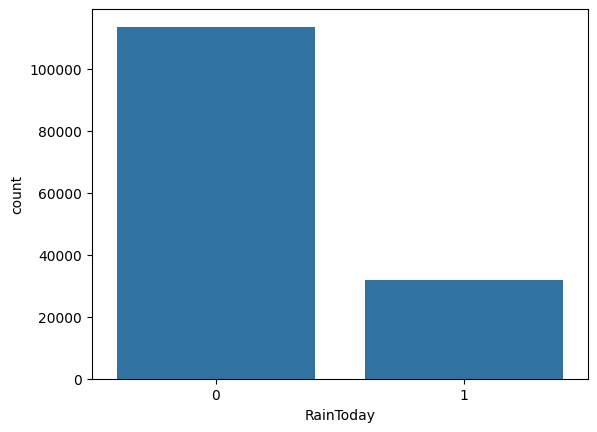

In [40]:
sns.countplot(x= df['RainToday'])

<Axes: xlabel='RainTomorrow', ylabel='count'>

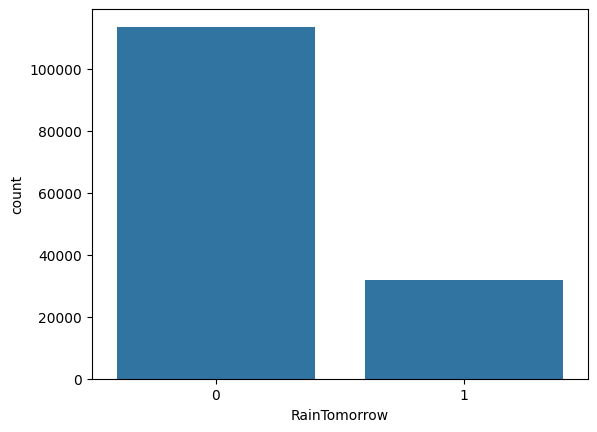

In [39]:
sns.countplot(x=df['RainTomorrow'])

In [48]:
outliers = df.columns[1:17]
outliers

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

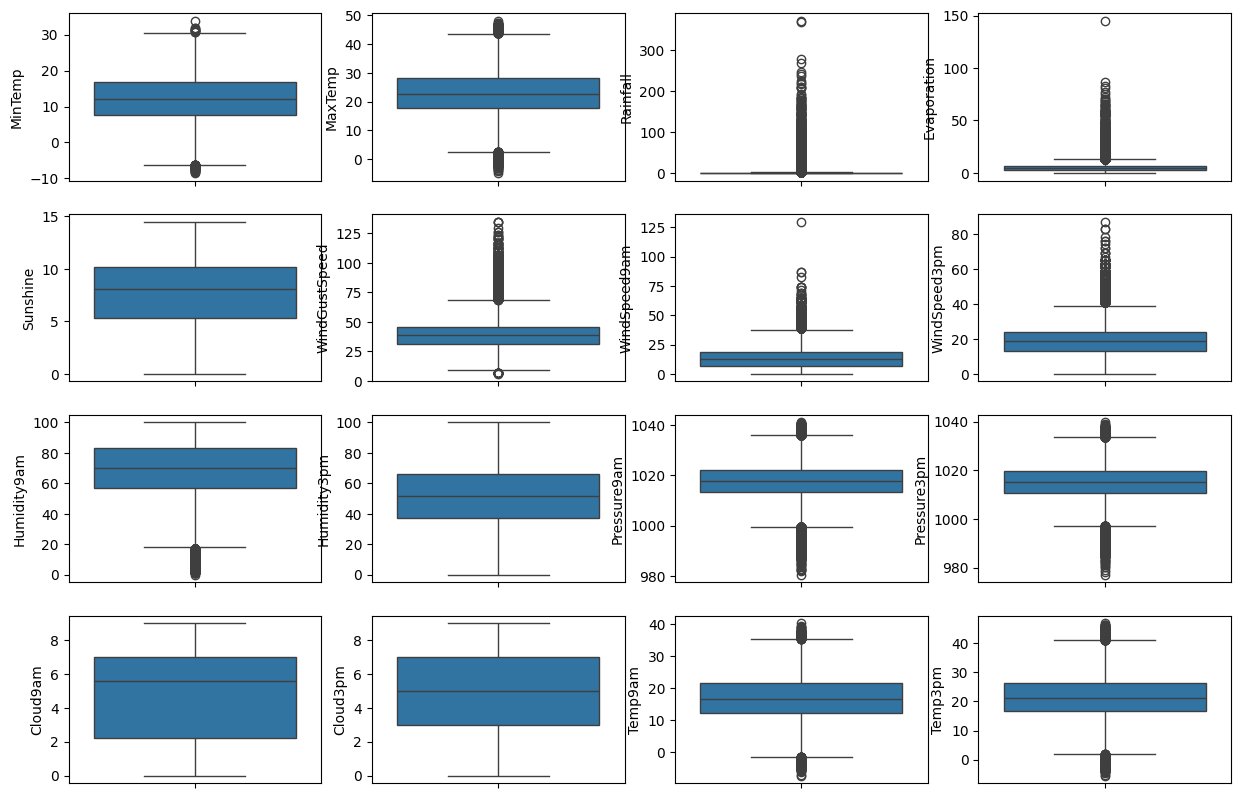

In [47]:
# ploting box plt to find outliers in MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
# 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm','Temp9am',
# 'Temp3pm'
plt.figure(figsize=(15, 10))
for i, col in enumerate(outliers, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[col])
plt.tight_layout
plt.show()

In [57]:
# prompt: i want to deal with outliers different kind of features

def treat_outliers(df, column_name, method='iqr', factor=1.5):
    """
    Treats outliers in a specified column of a Pandas DataFrame.

    Args:
        df: The input DataFrame.
        column_name: The name of the column to treat outliers.
        method: The method to use for outlier treatment ('iqr' or 'zscore').
        factor: The factor to use for IQR method (default is 1.5).

    Returns:
        A new DataFrame with outliers treated.
    """
    df_treated = df.copy()  # Create a copy to avoid modifying the original

    if method == 'iqr':
        Q1 = df_treated[column_name].quantile(0.25)
        Q3 = df_treated[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_treated[column_name] = np.clip(df_treated[column_name], lower_bound, upper_bound)
    elif method == 'zscore':
        z_scores = np.abs(stats.zscore(df_treated[column_name]))
        df_treated[column_name] = np.where(z_scores < 3, df_treated[column_name], np.nan) # Replace with NaN or use imputation method below
        # Imputation (Example: using median)
        df_treated[column_name].fillna(df_treated[column_name].median(), inplace=True)

    else:
        raise ValueError("Invalid outlier treatment method specified.")
    return df_treated


# Example usage (assuming 'df' is your DataFrame):
outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
            'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
            'Cloud3pm', 'Temp9am', 'Temp3pm']

for col in outliers:
    df = treat_outliers(df, col, method='iqr') # or method = 'zscore'

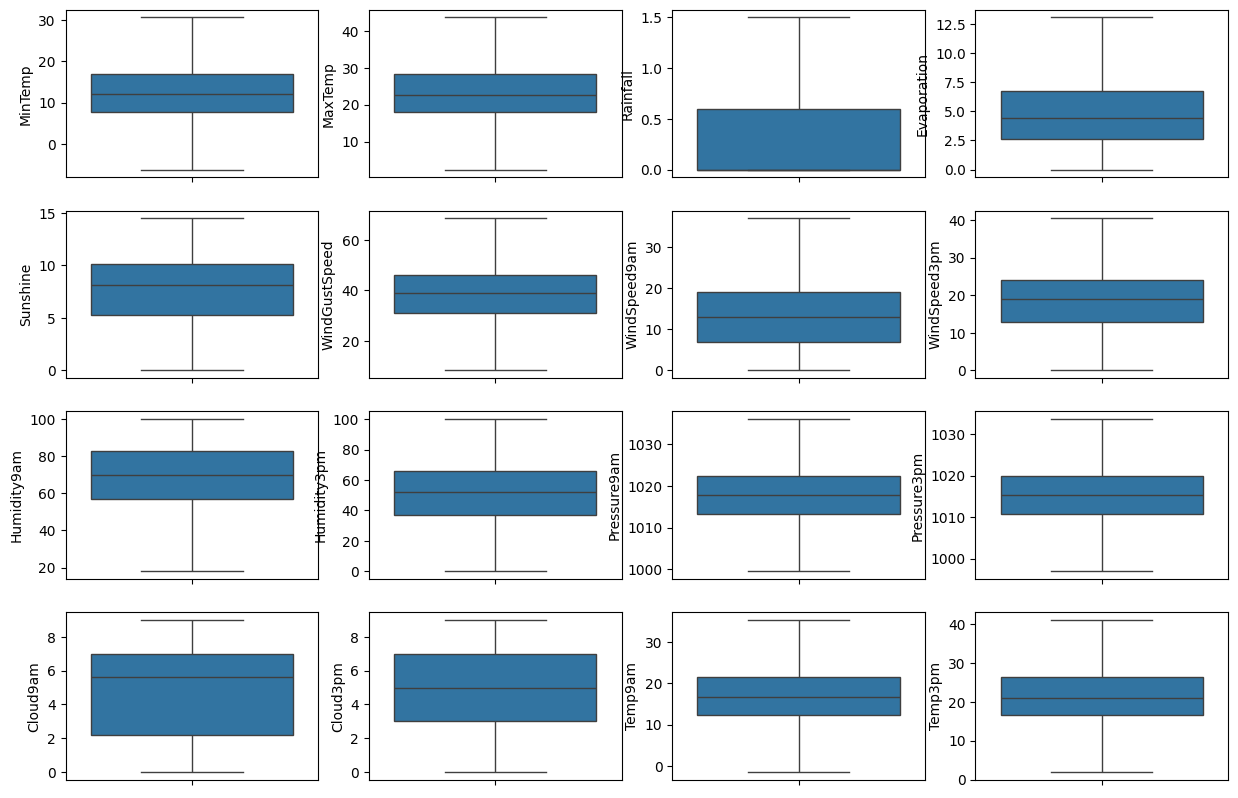

In [56]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(outliers, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(df[col])
plt.tight_layout
plt.show()

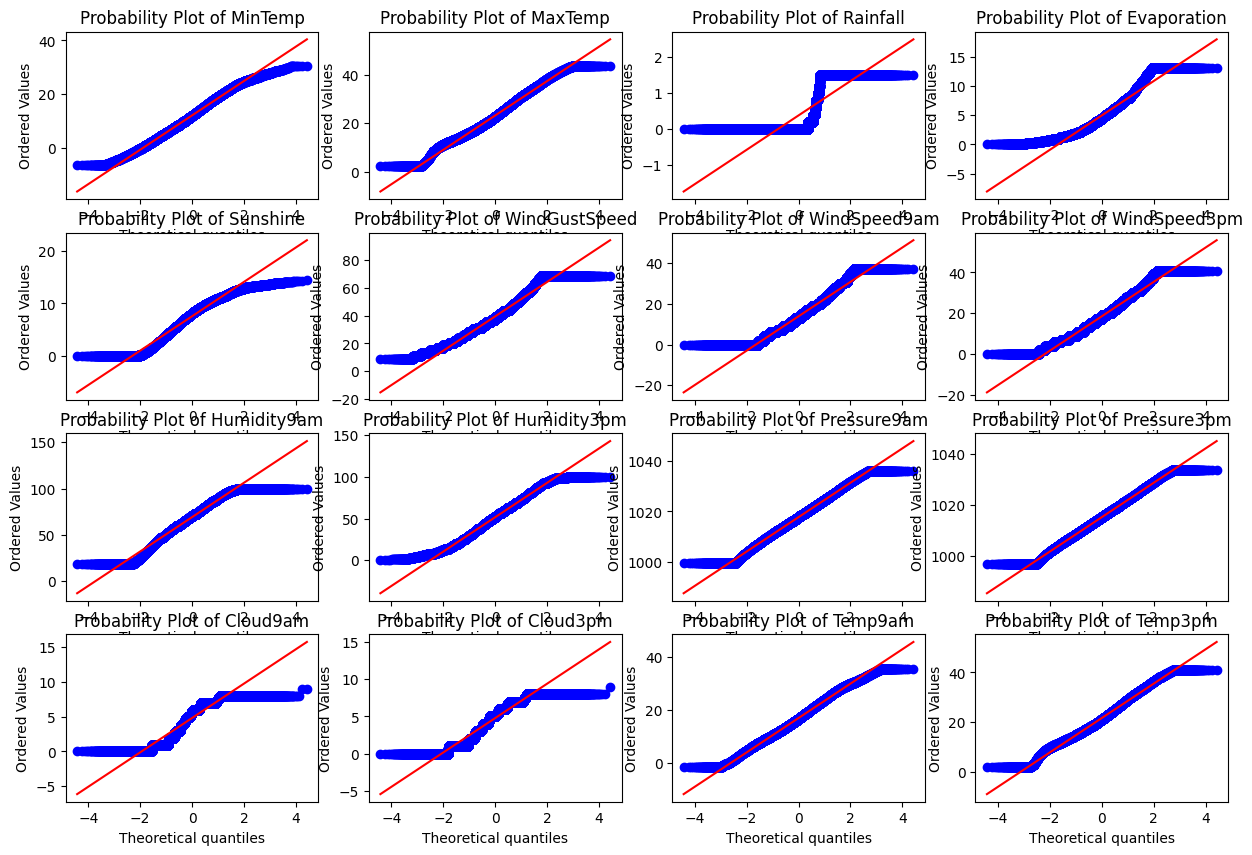

In [60]:
# ploting propablity plot for outliers
from scipy.stats import probplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(outliers, 1):
    plt.subplot(4, 4, i)
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Probability Plot of {col}")
plt.tight_layout
plt.show()